Analysing and Forecasting sales data in different aspects

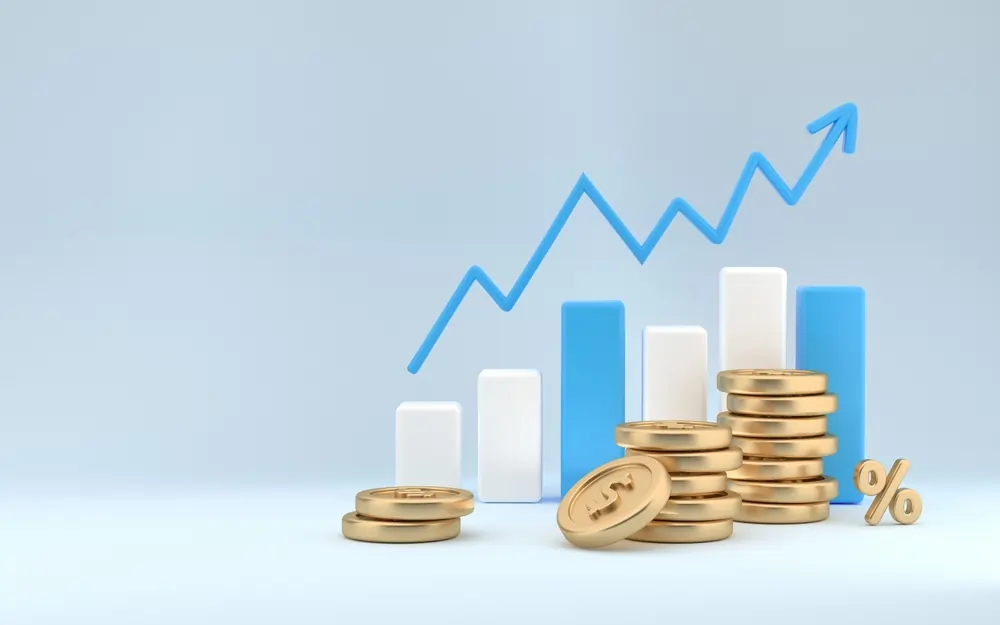

In [1]:
# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#importing data frame
df=pd.read_csv("/content/Financials.csv")

In [ ]:
df.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [36]:
df[' Units Sold ']=df[' Units Sold '].str.replace("[$, ]","",regex=True).astype(float)

In [37]:
df[' Manufacturing Price ']=df[' Manufacturing Price '].str.replace("[$, ]","",regex=True).astype(float)

In [38]:
df[' Sale Price ']=df[' Sale Price '].str.replace("[$, ]","",regex=True).astype(float)

In [39]:
df[' Gross Sales ']=df[' Gross Sales '].str.replace("[$, ]","",regex=True).astype(float)

In [40]:
df[' Discounts ']=df[' Discounts '].str.replace("[$,]","",regex=True)


In [ ]:
df.head(2)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014


In [41]:
df['  Sales ']=df['  Sales '].str.replace('[$, ]', '', regex=True).astype(float)

In [42]:
df[' COGS ']=df[' COGS '].str.replace("[$, ]","",regex=True).astype(float)

In [43]:
df[' Profit '] = df[' Profit '].str.replace('[$, -]', '', regex=True)
df[' Profit '] = pd.to_numeric(df[' Profit '], errors='coerce')


In [12]:
df.isnull().sum()

Segment                   0
Country                   0
 Product                  0
 Discount Band            0
 Units Sold               0
 Manufacturing Price      0
 Sale Price               0
 Gross Sales              0
 Discounts                0
  Sales                   0
 COGS                     0
 Profit                  63
Date                      0
Month Number              0
 Month Name               0
Year                      0
dtype: int64

In [44]:
df[' Profit '].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [ ]:
print(df.describe())

        Units Sold    Manufacturing Price    Sale Price    Gross Sales   \
count    700.000000             700.000000    700.000000   7.000000e+02   
mean    1608.294286              96.477143    118.428571   1.827594e+05   
std      867.427859             108.602612    136.775515   2.542623e+05   
min      200.000000               3.000000      7.000000   1.799000e+03   
25%      905.000000               5.000000     12.000000   1.739175e+04   
50%     1542.500000              10.000000     20.000000   3.798000e+04   
75%     2229.125000             250.000000    300.000000   2.790250e+05   
max     4492.500000             260.000000    350.000000   1.207500e+06   

             Sales           COGS         Profit   Month Number         Year  
count  7.000000e+02     700.000000     700.000000    700.000000   700.000000  
mean   1.696091e+05  145475.211429   25244.319343      7.900000  2013.750000  
std    2.367263e+05  203865.506118   41834.379419      3.377321     0.433322  
min    1

In [ ]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Segment                700 non-null    object 
 1   Country                700 non-null    object 
 2    Product               700 non-null    object 
 3    Discount Band         700 non-null    object 
 4    Units Sold            700 non-null    float64
 5    Manufacturing Price   700 non-null    float64
 6    Sale Price            700 non-null    float64
 7    Gross Sales           700 non-null    float64
 8    Discounts             700 non-null    object 
 9     Sales                700 non-null    float64
 10   COGS                  700 non-null    float64
 11   Profit                700 non-null    float64
 12  Date                   700 non-null    object 
 13  Month Number           700 non-null    int64  
 14   Month Name            700 non-null    object 
 15  Year  

1. Sales Performance Analysis

In [45]:
df['Revenue']=df[' Profit ']+df[' Manufacturing Price ']

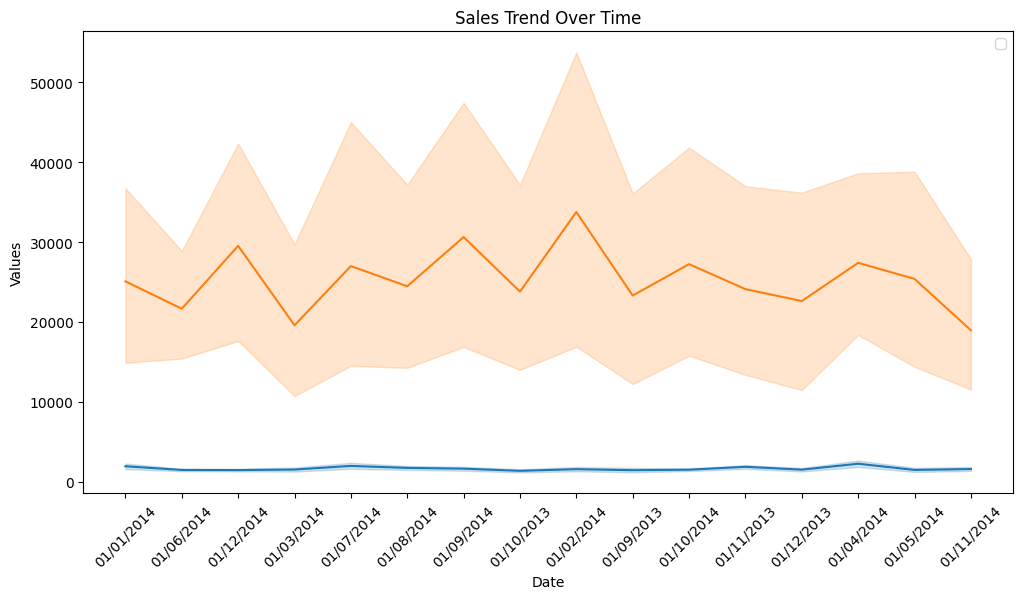

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'],y=df[' Units Sold '],data=df)
sns.lineplot(x=df['Date'],y=df['Revenue'],data=df)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

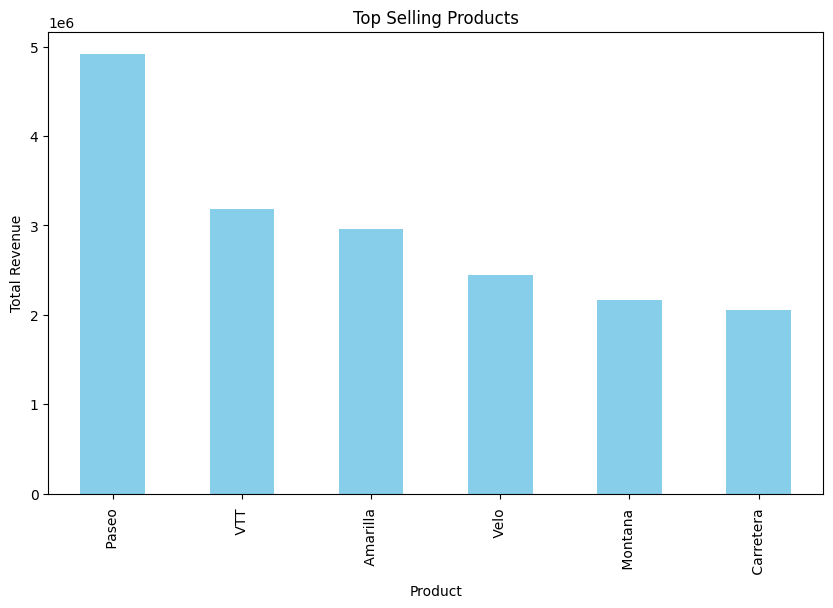

In [ ]:
top_products = df.groupby(' Product ')['Revenue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()


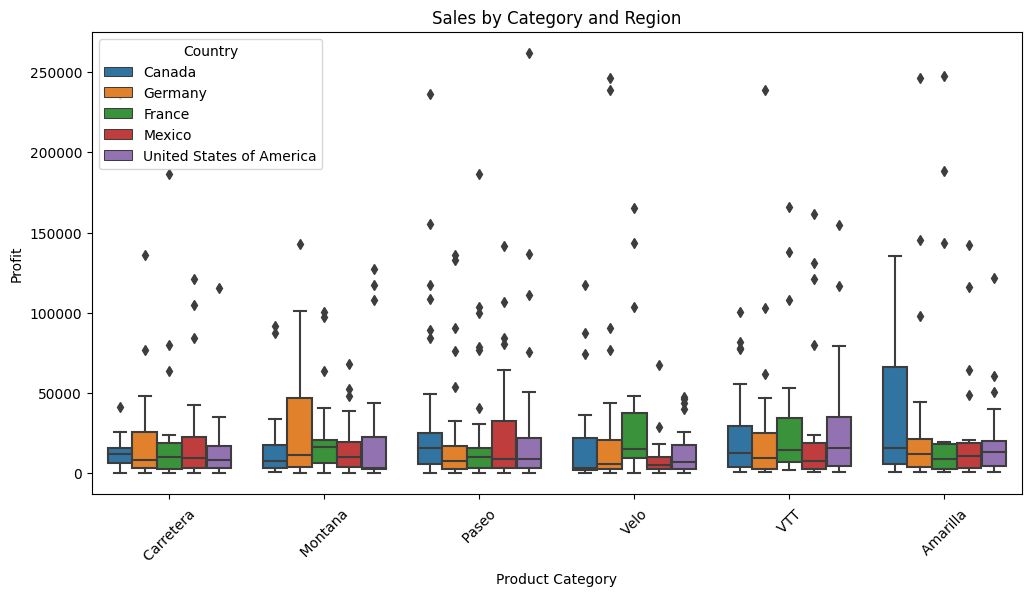

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=' Product ', y='Revenue', hue='Country', data=df)
plt.title('Sales by Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()

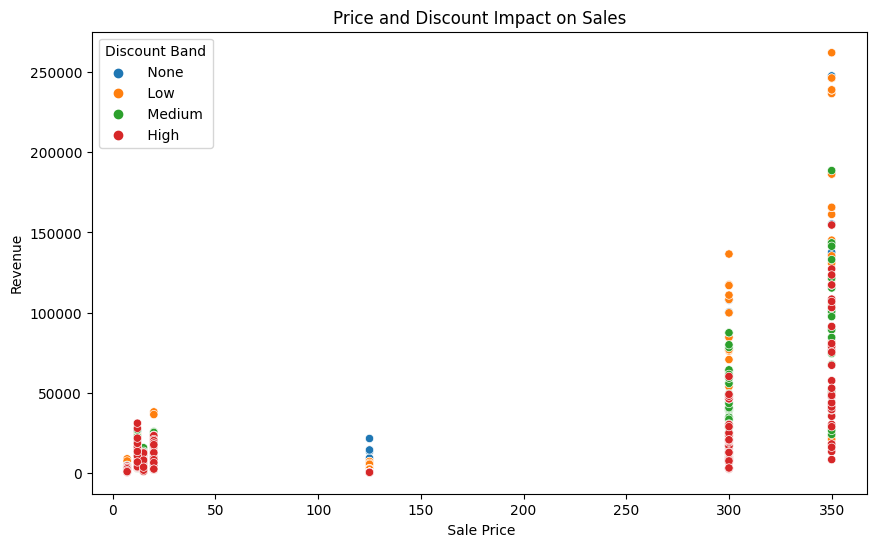

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Sale Price ', y='Revenue', hue=' Discount Band ', data=df)
plt.title('Price and Discount Impact on Sales')
plt.xlabel(' Sale Price')
plt.ylabel('Revenue')
plt.legend(title='Discount Band')
plt.show()

By the above graphs we can understand when the discount bound is high then the units sold are also high.When we compare country and segmentation according to sales then we can observe that sales of the product amarilla in canada and paseo is the highest selling product.The sales is high in 1-4-2014.

<ipython-input-50-2ef0138cc005>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


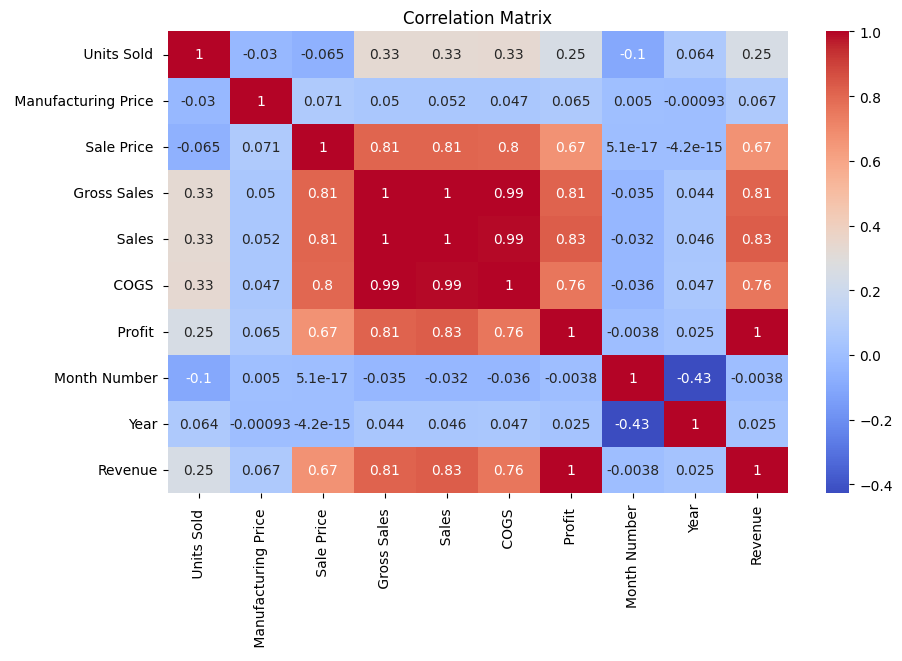

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


2. **Profitability Analysis**

In [46]:
df['pro margin']=(df[' Profit ']/df['  Sales '])*100

<Axes: xlabel='Segment', ylabel='pro margin'>

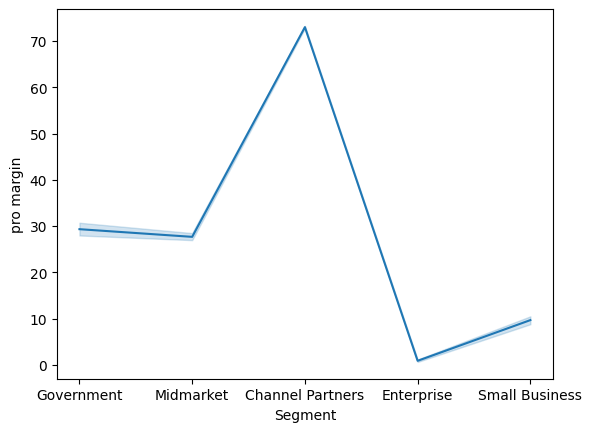

In [ ]:
sns.lineplot(x=df['Segment'],y=df['pro margin'])

<Axes: xlabel='Country', ylabel='pro margin'>

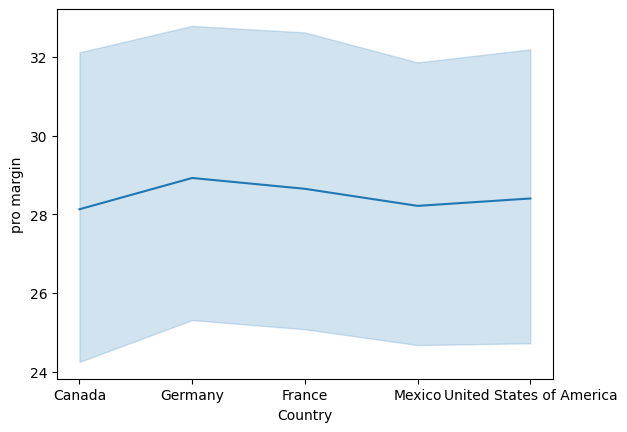

In [ ]:
sns.lineplot(x=df['Country'],y=df['pro margin'])

<Axes: xlabel=' Product ', ylabel='pro margin'>

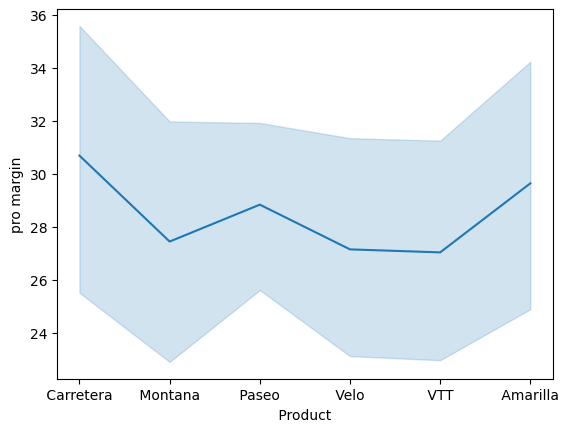

In [ ]:
sns.lineplot(x=df[' Product '],y=df['pro margin'])

<Axes: xlabel='Year', ylabel='pro margin'>

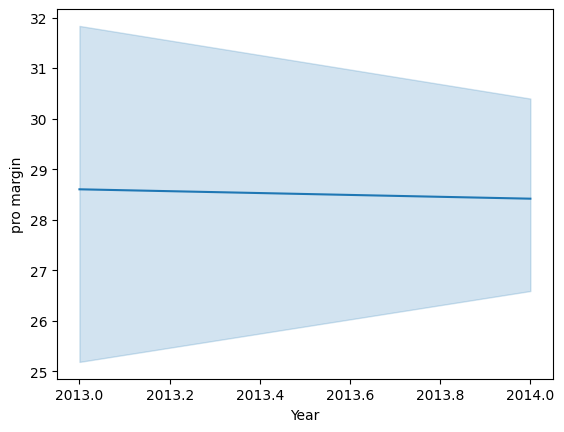

In [ ]:
sns.lineplot(x=df['Year'],y=df['pro margin'])

Here pro margin in the year 2013 is high.According to the graphs carreters is the most profitable product in germany in the segment of channel partners.

3. **Pricing Strategy Evaluation**:

<Axes: xlabel=' Discounts ', ylabel=' Profit '>

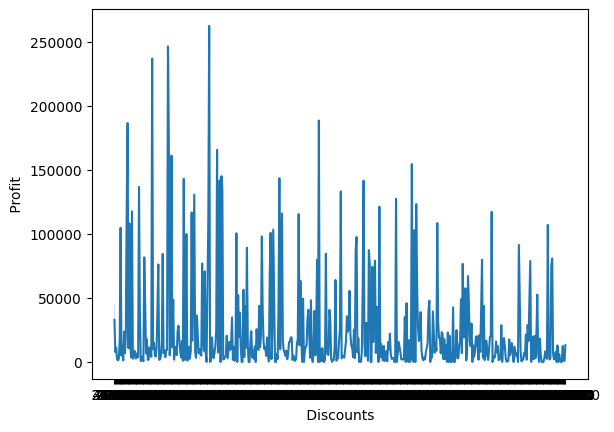

In [51]:
sns.lineplot(y=df[' Profit '],x=df[' Discounts '])

<Axes: xlabel=' Sale Price ', ylabel='  Sales '>

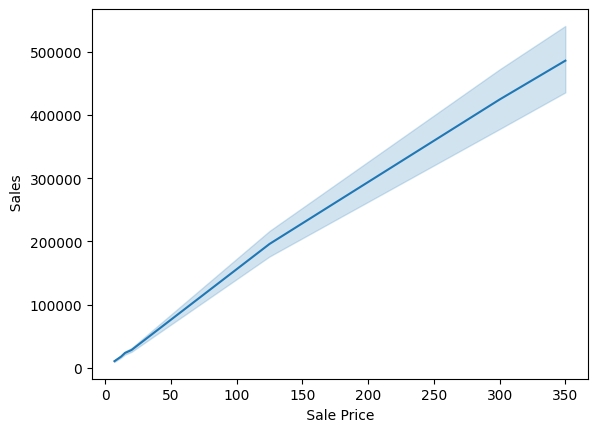

In [ ]:
sns.lineplot(x=df[' Sale Price '],y=df['  Sales '])

By this we can understand that as the sales increases the price is also incresing and when the discount bands are medium and low then we have high profits.

4. **Discount Analysis**

<Axes: xlabel=' Discount Band ', ylabel='  Sales '>

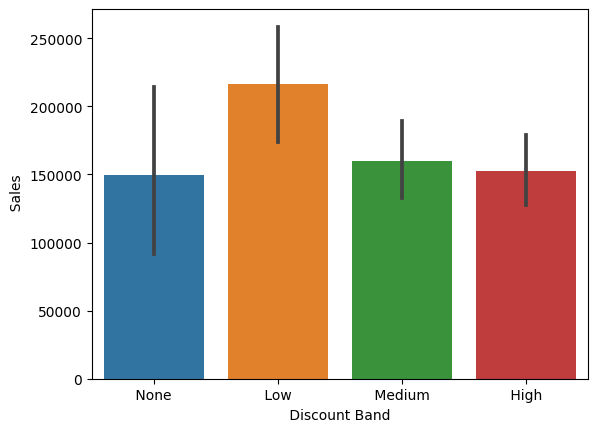

In [52]:
sns.barplot(x=df[' Discount Band '],y=df['  Sales '])

<Axes: xlabel=' Discount Band ', ylabel='Revenue'>

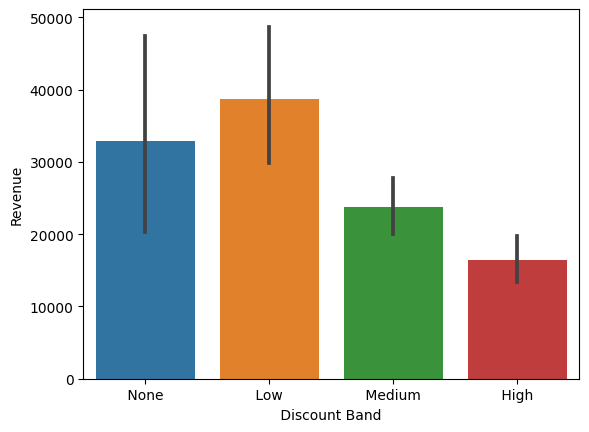

In [53]:
sns.barplot(x=df[' Discount Band '],y=df['Revenue'])

By the above vizualisations we can understand that when the discount band is high then we had high sales and revenue

5. **Segmentation Analysis**

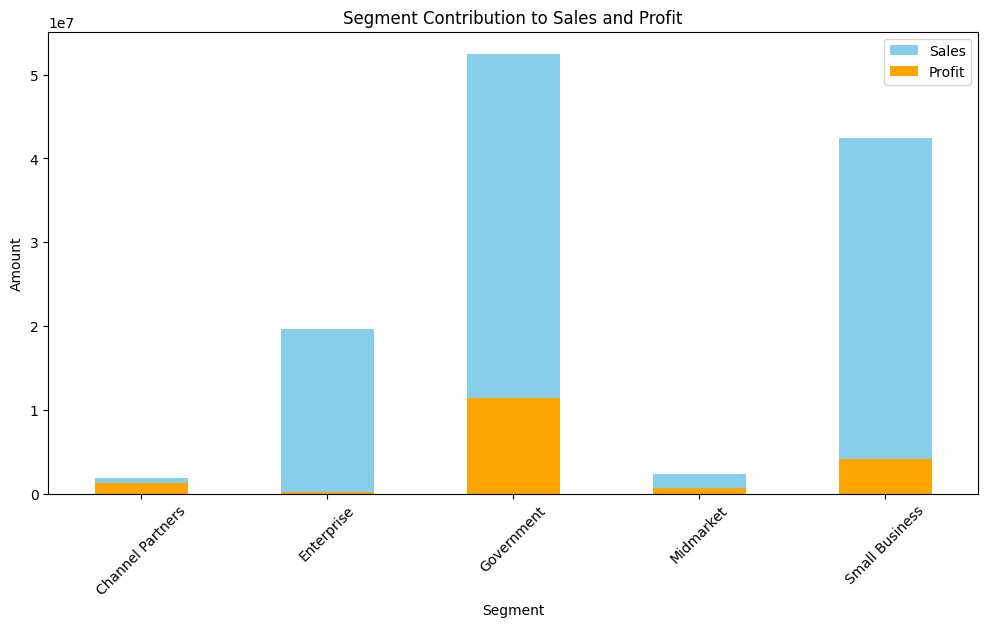

In [ ]:
# Calculate total sales and profit for each segment
segment_sales = df.groupby('Segment')['  Sales '].sum()
segment_profit = df.groupby('Segment')[' Profit '].sum()

# Plot segment contribution to total sales and profit
plt.figure(figsize=(12, 6))
segment_sales.plot(kind='bar', color='skyblue', label='Sales')
segment_profit.plot(kind='bar', color='orange', label='Profit')
plt.title('Segment Contribution to Sales and Profit')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()



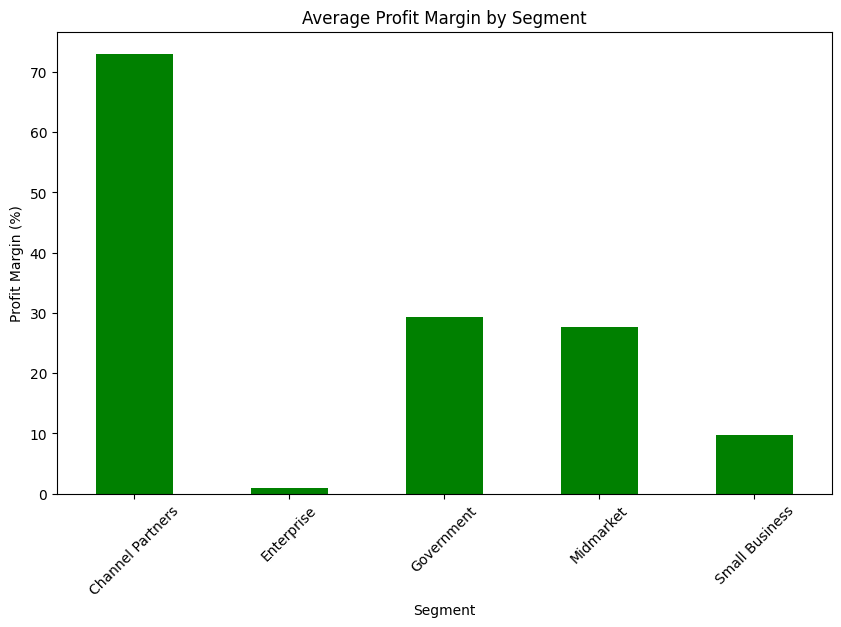

In [ ]:
segment_profit_margin = df.groupby('Segment')['pro margin'].mean()

plt.figure(figsize=(10, 6))
segment_profit_margin.plot(kind='bar', color='green')
plt.title('Average Profit Margin by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()





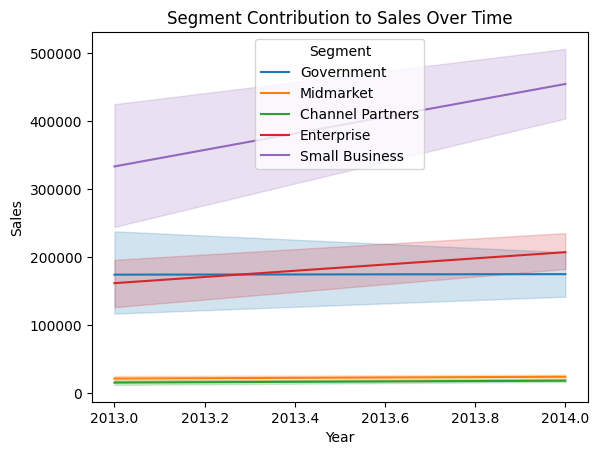

In [ ]:
sns.lineplot(x='Year', y='  Sales ', hue='Segment', data=df)
plt.title('Segment Contribution to Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Segment')
plt.show()

By the above graphs we can understand that small business have high sales in all the segments and the segment type government is having high sales and high profits.Enterprise is very weak in all the sectors

6. **Geographical Analysis**

<Axes: xlabel=' Product ', ylabel='  Sales '>

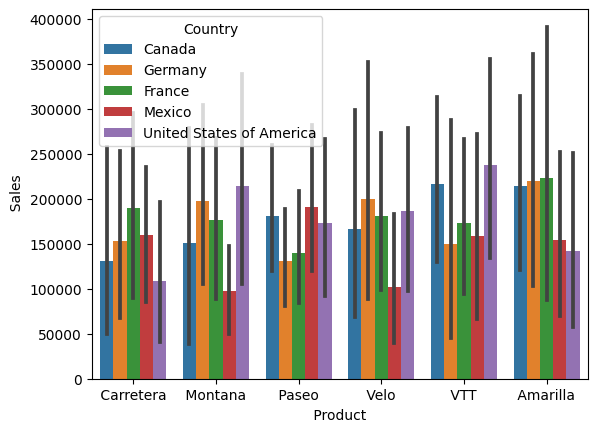

In [ ]:
sns.barplot(x=' Product ',y='  Sales ',hue='Country',data=df)

<Axes: xlabel='Year', ylabel='pro margin'>

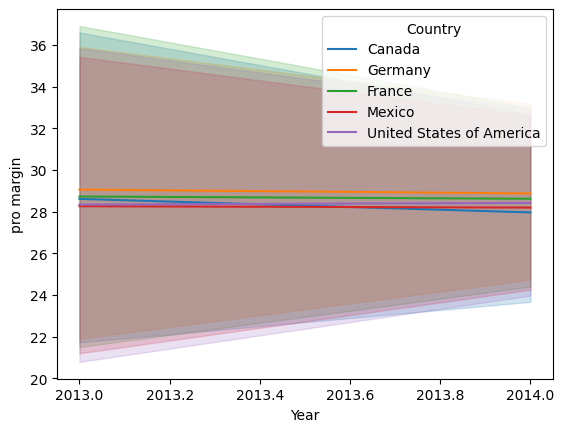

In [ ]:
sns.lineplot(x=df['Year'],y=df['pro margin'],hue=df['Country'])

"VTT" has high sales in united states.

7. **Trend Analysis**

In [67]:
df1=pd.read_csv("/content/Financials.csv")
df1[' Units Sold ']=df1[' Units Sold '].str.replace("[$, ]","",regex=True).astype(float)
df1[' Manufacturing Price ']=df1[' Manufacturing Price '].str.replace("[$, ]","",regex=True).astype(float)
df1[' Sale Price ']=df1[' Sale Price '].str.replace("[$, ]","",regex=True).astype(float)
df1[' Gross Sales ']=df1[' Gross Sales '].str.replace("[$, ]","",regex=True).astype(float)
df1[' Discounts ']=df1[' Discounts '].str.replace("[$,]","",regex=True)
df1['  Sales ']=df1['  Sales '].str.replace('[$, ]', '', regex=True).astype(float)
df1[' COGS ']=df1[' COGS '].str.replace("[$, ]","",regex=True).astype(float)
df1[' Profit '] = df1[' Profit '].str.replace('[$, -]', '', regex=True)
df1[' Profit '] = pd.to_numeric(df1[' Profit '], errors='coerce')
df1[' Profit '].fillna(0,inplace=True)
df1['Revenue']=df1[' Profit ']+df1[' Manufacturing Price ']
df1['pro margin']=(df1[' Profit ']/df1['  Sales '])*100


<Figure size 1200x800 with 0 Axes>

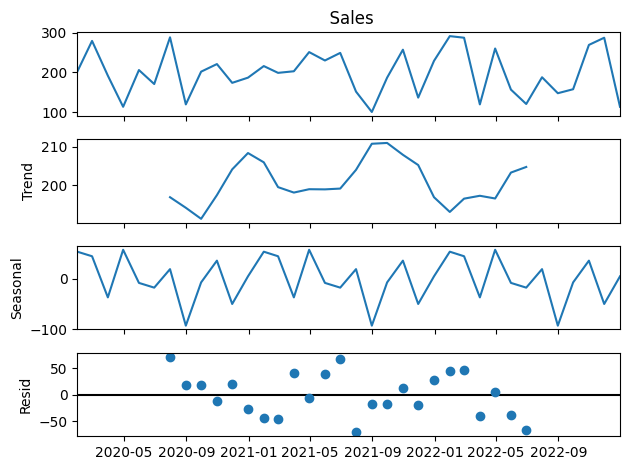

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create synthetic data with a larger number of observations
np.random.seed(42)
num_months = 36
date_range = pd.date_range(start='2020-01-01', periods=num_months, freq='M')
sales_data = np.random.randint(100, 300, size=num_months)

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, '  Sales ': sales_data})
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['  Sales '], model='additive')

# Plot decomposition components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


8. **COGS and Manufacturing Cost Analysis**

Text(0.5, 1.0, ' comparison between sales and manufacturing prices')

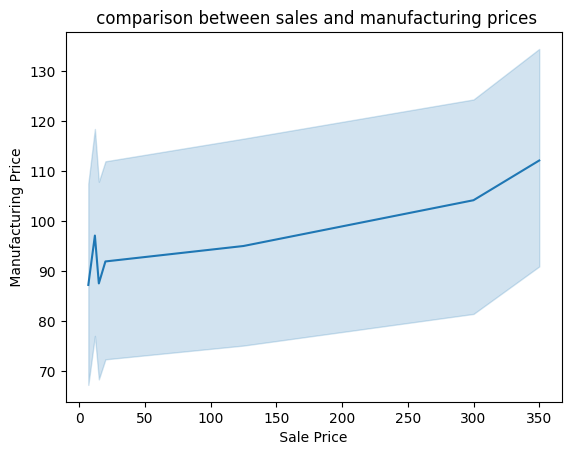

In [ ]:
sns.lineplot(x=' Sale Price ',y=' Manufacturing Price ',data=df)
plt.title(" comparison between sales and manufacturing prices")

Text(0.5, 1.0, ' comparison between sales price and revenue')

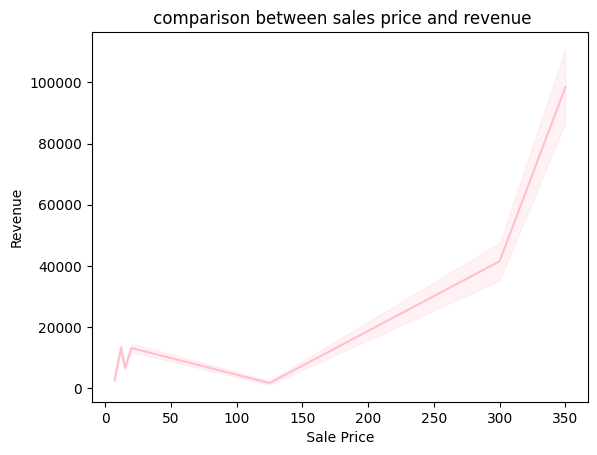

In [ ]:
sns.lineplot(x=' Sale Price ',y='Revenue',data=df,color='pink')
plt.title(" comparison between sales price and revenue")

Text(0.5, 1.0, ' comparison between revenue and manufacturing prices')

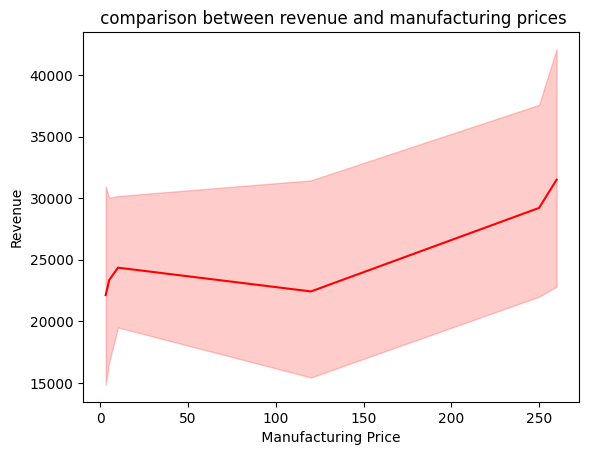

In [ ]:
sns.lineplot(x=' Manufacturing Price ',y='Revenue',data=df,color='red')
plt.title(" comparison between revenue and manufacturing prices")

When the manufacturing or the sales prices are increasing then we have high revenues

9. **Product Performance Comparison**

<Axes: xlabel=' Product ', ylabel=' Sale Price '>

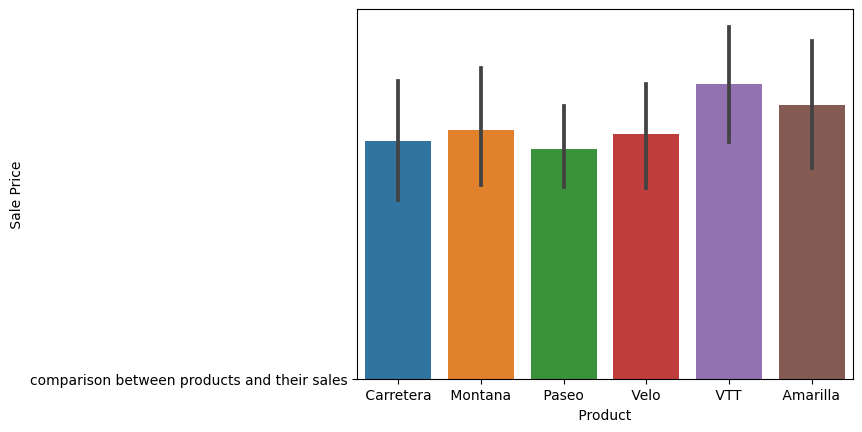

In [ ]:
plt.plot("comparison between products and their sales")
sns.barplot(x=df[' Product '],y=df[' Sale Price '],data=df)


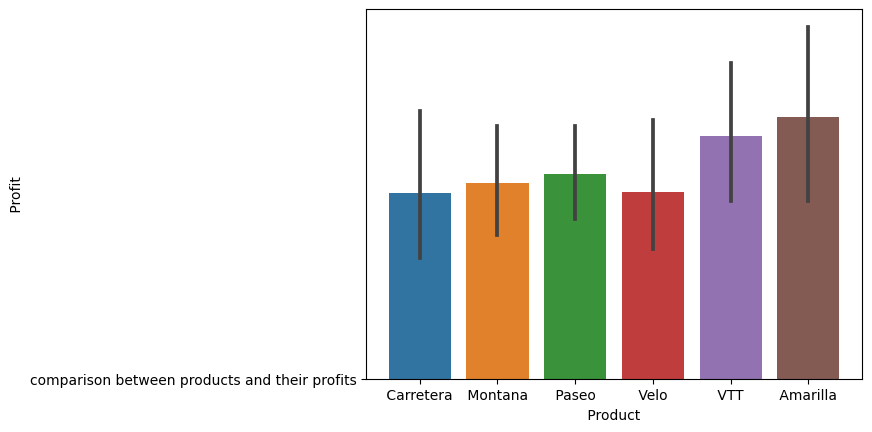

In [ ]:
sns.barplot(x=df[' Product '],y=df[' Profit '])
plt.plot("comparison between products and their profits")

Text(0, 0.5, '')

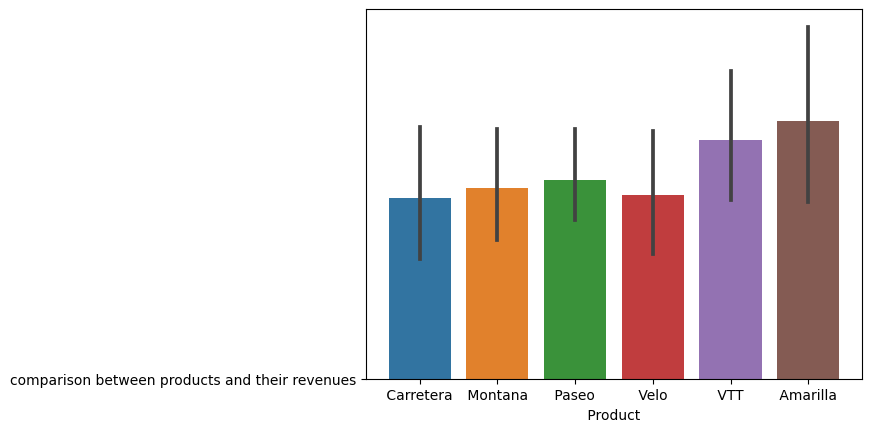

In [ ]:
sns.barplot(x=df[' Product '],y=df['Revenue'])
plt.plot("comparison between products and their revenues")
plt.ylabel('')

By this graphs we can say amarilla is the best performing product

10. **Month-to-Month Variations**

<Axes: xlabel='Month Number', ylabel='  Sales '>

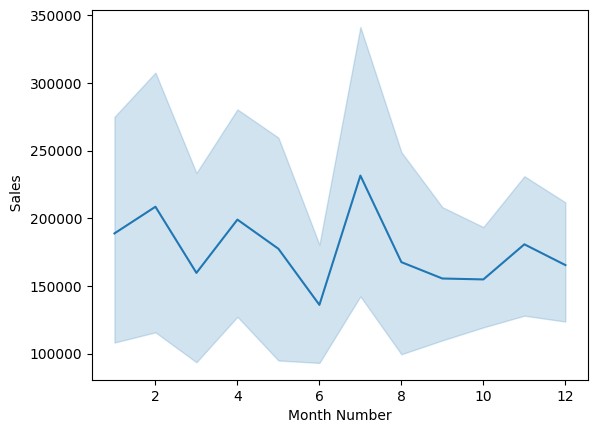

In [ ]:
sns.lineplot(x=df['Month Number'],y=df['  Sales '])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ' January '),
  Text(1, 0, ' June '),
  Text(2, 0, ' December '),
  Text(3, 0, ' March '),
  Text(4, 0, ' July '),
  Text(5, 0, ' August '),
  Text(6, 0, ' September '),
  Text(7, 0, ' October '),
  Text(8, 0, ' February '),
  Text(9, 0, ' November '),
  Text(10, 0, ' April '),
  Text(11, 0, ' May ')])

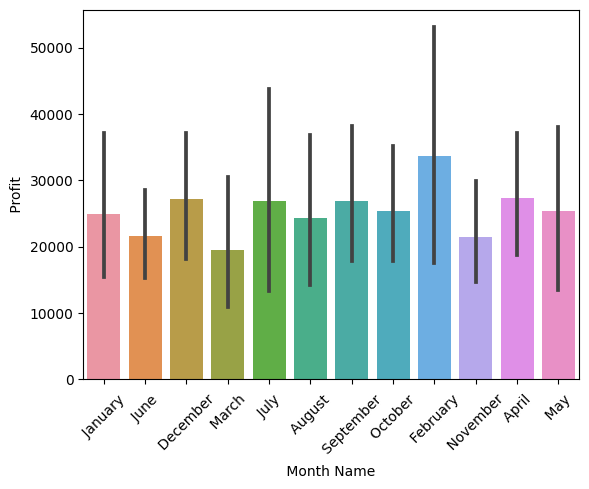

In [ ]:
sns.barplot(x=df[' Month Name '],y=df[' Profit '])
plt.xticks(rotation=45)

<Axes: xlabel='Month Number', ylabel='Revenue'>

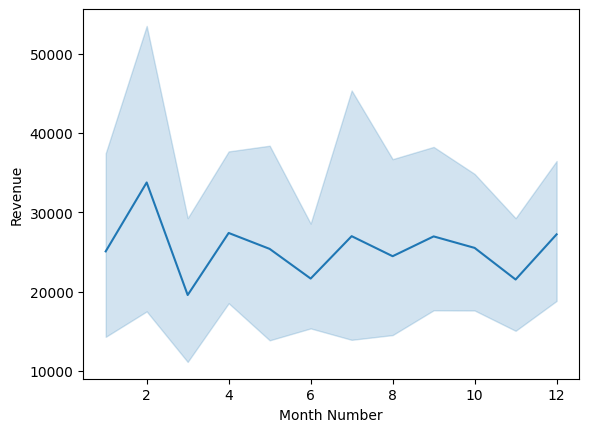

In [ ]:
sns.lineplot(x=df['Month Number'],y=df['Revenue'])

We are having high profit and revenue generation in the month of "February".

11. **Yearly Performance Assessment**

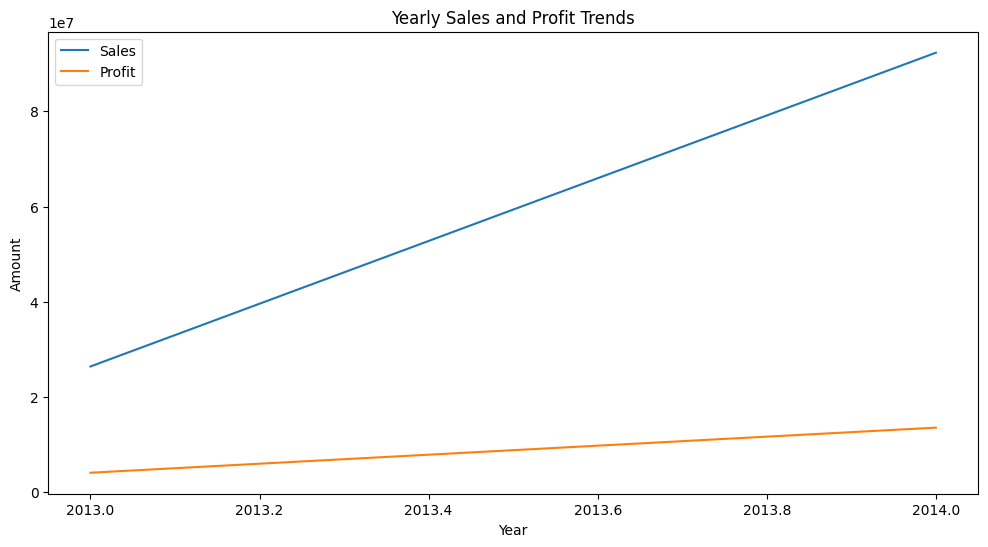

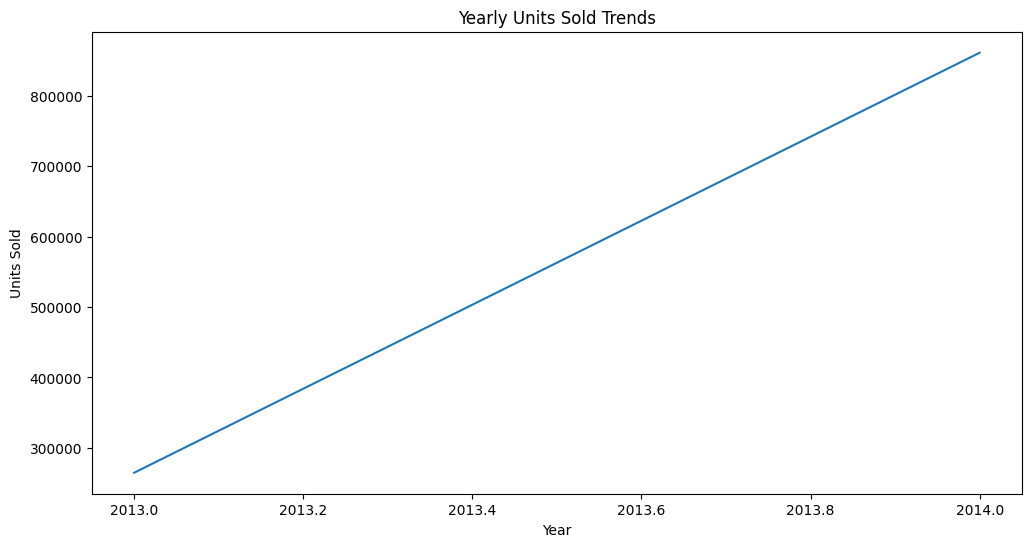

Yearly Growth Opportunities:
   Year       Sales       Profit    Units Sold   Growth Rate
1  2014  92311094.78  13570221.53      861132.0   249.461298


In [19]:
yearly_performance = df.groupby('Year').agg({
    '  Sales ': 'sum',
    ' Profit ': 'sum',
    ' Units Sold ': 'sum'
}).reset_index()

# Plot yearly sales and profit trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_performance, x='Year', y='  Sales ', label='Sales')
sns.lineplot(data=yearly_performance, x='Year', y=' Profit ', label='Profit')
plt.title('Yearly Sales and Profit Trends')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()
# Plot yearly units sold trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_performance, x='Year', y=' Units Sold ')
plt.title('Yearly Units Sold Trends')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.show()

# Identify growth opportunities
yearly_performance['Growth Rate'] = yearly_performance['  Sales '].pct_change() * 100
growth_opportunities = yearly_performance[yearly_performance['Growth Rate'] > 0]

print("Yearly Growth Opportunities:")
print(growth_opportunities)

12. **Profit Optimization**

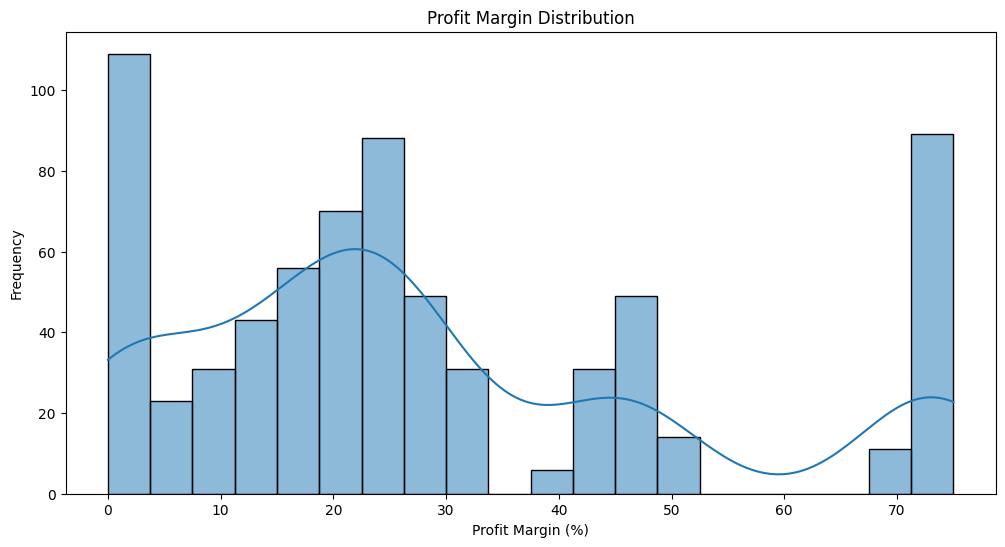

In [ ]:
df['Markup'] = ((df[' Sale Price '] - df[' Manufacturing Price ']) / df[' Manufacturing Price ']) * 100

# Explore profit margin and markup distributions
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='pro margin', bins=20, kde=True)
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()

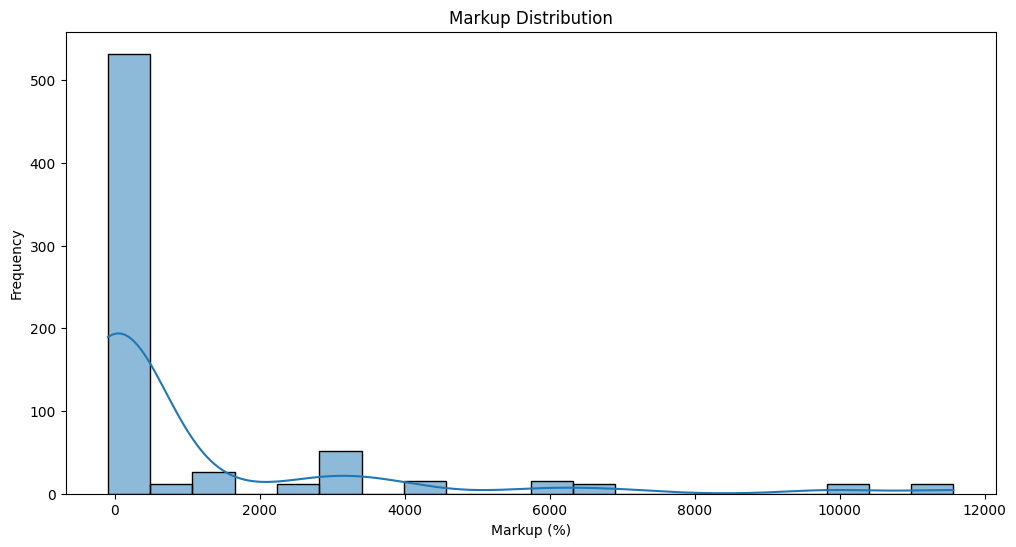

Low-Profit Products:
       Product   pro margin       Markup
11     Montana     4.000000  2400.000000
12     Montana    16.666667  5900.000000
14     Montana     4.000000  2400.000000
23       Paseo    16.666667  2900.000000
32        Velo     4.000000     4.166667
..          ...         ...          ...
693        VTT     0.000000   -50.000000
695   Amarilla     1.960784    15.384615
696   Amarilla     1.960784    15.384615
697    Montana    15.966387    40.000000
698      Paseo    15.966387   -30.000000

[278 rows x 3 columns]

Potential Strategies for Optimization:
        Product   pro margin      Markup
0     Carretera    50.000000  566.666667
1     Carretera    50.000000  566.666667
2     Carretera    33.333333  400.000000
3     Carretera    33.333333  400.000000
4     Carretera    33.333333  400.000000
..           ...         ...         ...
687        Velo    70.588235  -90.000000
688         VTT    41.176471  -92.000000
690         VTT    41.176471  -92.000000
694         V

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Markup', bins=20, kde=True)
plt.title('Markup Distribution')
plt.xlabel('Markup (%)')
plt.ylabel('Frequency')
plt.show()

# Identify low-profit products
low_profit = df[df['pro margin'] < 20]  # Adjust threshold as needed
# Identify potential strategies for optimization
profitable = df[df['pro margin'] > 30]  # Adjust threshold as needed

# Print low-profit products and potential strategies
print("Low-Profit Products:")
print(low_profit[[' Product ', 'pro margin', 'Markup']])

print("\nPotential Strategies for Optimization:")
print(profitable[[' Product ', 'pro margin', 'Markup']])

13. **Financial Forecasting**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

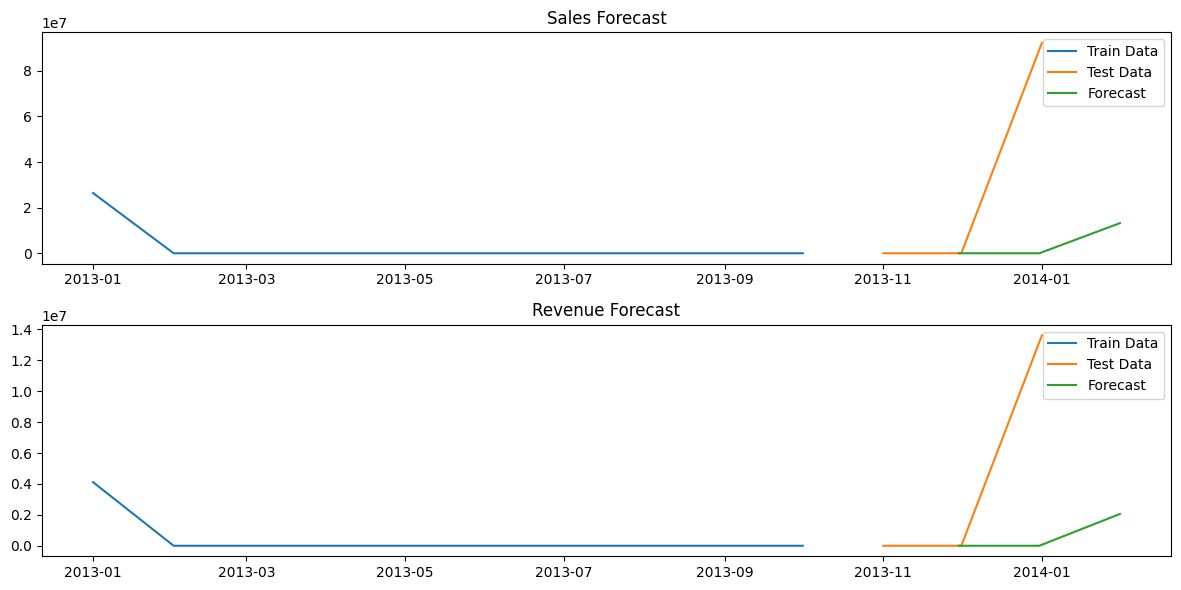

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
from statsmodels.tsa.arima_model import ARMA



df1 = df.groupby('Date')[['  Sales ','Revenue', ' Profit ']].sum()


regular_frequency = 'MS'





df1 = df1.resample(regular_frequency).sum()


train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


sarima_sales = SARIMAX(train_data['  Sales '],
                          order=(1, 1, 1),
                          seasonal_order=(1, 1, 1, 12))
sarima_sales_fit = sarima_sales.fit(disp=False)


forecast_sales = sarima_sales_fit.get_forecast(steps=len(test_data))
forecast_sales_index = pd.date_range(start=train_data.index[-1], periods=len(test_data)+1, freq='M')[1:]
forecast_sales= pd.Series(forecast_sales.predicted_mean.values, index=forecast_sales_index)


sarima_revenue = SARIMAX(train_data['Revenue'],
                          order=(1, 1, 1),
                          seasonal_order=(1, 1, 1, 12))
sarima_revenue_fit = sarima_revenue.fit(disp=False)


forecast_revenue = sarima_revenue_fit.get_forecast(steps=len(test_data))
forecast_revenue_index = pd.date_range(start=train_data.index[-1], periods=len(test_data)+1, freq='M')[1:]
forecast_revenue = pd.Series(forecast_revenue.predicted_mean.values, index=forecast_revenue_index)



plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data['  Sales '], label='Train Data')
plt.plot(test_data.index, test_data['  Sales '], label='Test Data')
plt.plot(forecast_sales.index, forecast_sales.values, label='Forecast')
plt.title('Sales Forecast')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train_data.index, train_data['Revenue'], label='Train Data')
plt.plot(test_data.index, test_data['Revenue'], label='Test Data')
plt.plot(forecast_revenue.index, forecast_revenue.values, label='Forecast')
plt.title('Revenue Forecast')
plt.legend()



plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


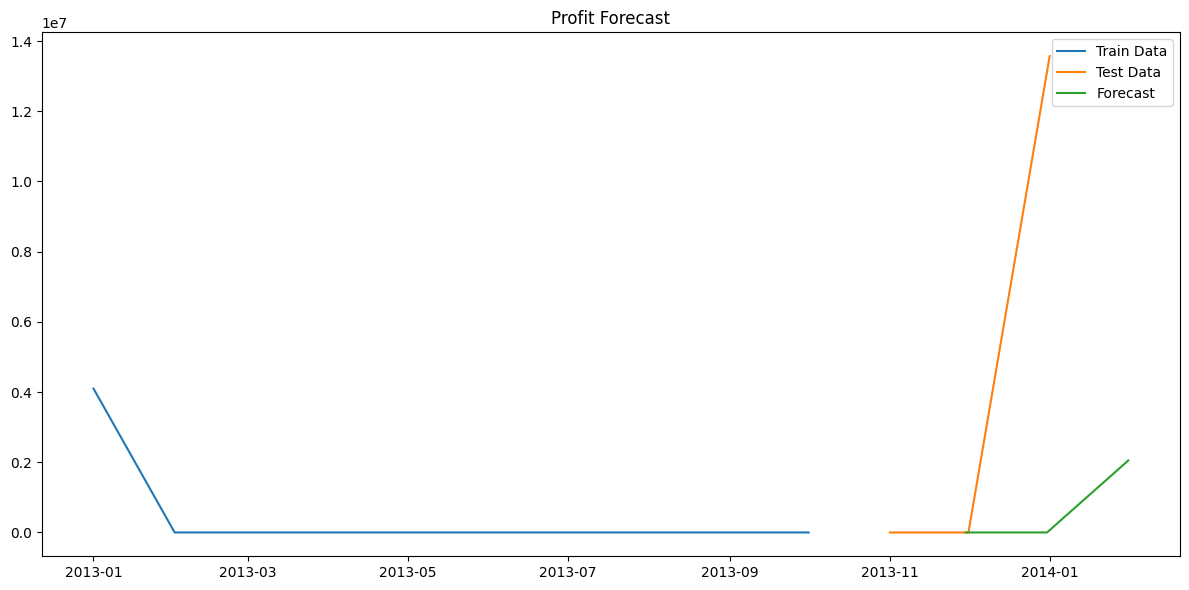

In [28]:
sarima_profit = SARIMAX(train_data[' Profit '],
                          order=(1, 1, 1),
                          seasonal_order=(1, 1, 1, 12))
sarima_profit_fit = sarima_profit.fit(disp=False)


forecast_profit = sarima_profit_fit.get_forecast(steps=len(test_data))
forecast_profit_index = pd.date_range(start=train_data.index[-1], periods=len(test_data)+1, freq='M')[1:]
forecast_profit = pd.Series(forecast_profit.predicted_mean.values, index=forecast_profit_index)

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[' Profit '], label='Train Data')
plt.plot(test_data.index, test_data[' Profit '], label='Test Data')
plt.plot(forecast_profit.index, forecast_profit.values, label='Forecast')
plt.title('Profit Forecast')
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_sales= mean_absolute_error(test_data['  Sales '], forecast_sales)
mse_sales = mean_squared_error(test_data['  Sales '], forecast_sales)
rmse_sales = np.sqrt(mse_sales)

mae_profit= mean_absolute_error(test_data[' Profit '], forecast_profit)
mse_profit= mean_squared_error(test_data[' Profit '], forecast_profit)
rmse_profit= np.sqrt(mse_profit)

mae_revenue= mean_absolute_error(test_data['Revenue'], forecast_profit)
mse_revenue= mean_squared_error(test_data['Revenue'], forecast_profit)
rmse_revenue= np.sqrt(mse_revenue)

print("Accuracy Metrics for Sales:")
print(f"MAE: {mae_sales:.2f}")
print(f"MSE: {mse_sales:.2f}")
print(f"RMSE: {rmse_sales:.2f}")

print("\nAccuracy Metrics for Profit:")
print(f"MAE: {mae_profit:.2f}")
print(f"MSE: {mse_profit:.2f}")
print(f"RMSE: {rmse_profit:.2f}")

print("\nAccuracy Metrics for Revenue:")
print(f"MAE: {mae_revenue:.2f}")
print(f"MSE: {mse_revenue:.2f}")
print(f"RMSE: {rmse_revenue:.2f}")


Accuracy Metrics for Sales:
MAE: 26367820.14
MSE: 2085785816868894.00
RMSE: 45670404.17

Accuracy Metrics for Profit:
MAE: 3839939.83
MSE: 44235413769324.18
RMSE: 6650970.89

Accuracy Metrics for Revenue:
MAE: 3856813.17
MSE: 44625023406177.43
RMSE: 6680196.36


14. **Customer Segmentation**

In [47]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year', 'Revenue', 'pro margin'],
      dtype='object')

In [49]:
customer_revenue = df.groupby('Country')['Revenue'].sum()
top_spending_customers = customer_revenue.sort_values(ascending=False)
print(top_spending_customers)


Country
France                      3920128.54
Germany                     3834255.07
Canada                      3706867.64
United States of America    3210689.18
Mexico                      3066617.11
Name: Revenue, dtype: float64


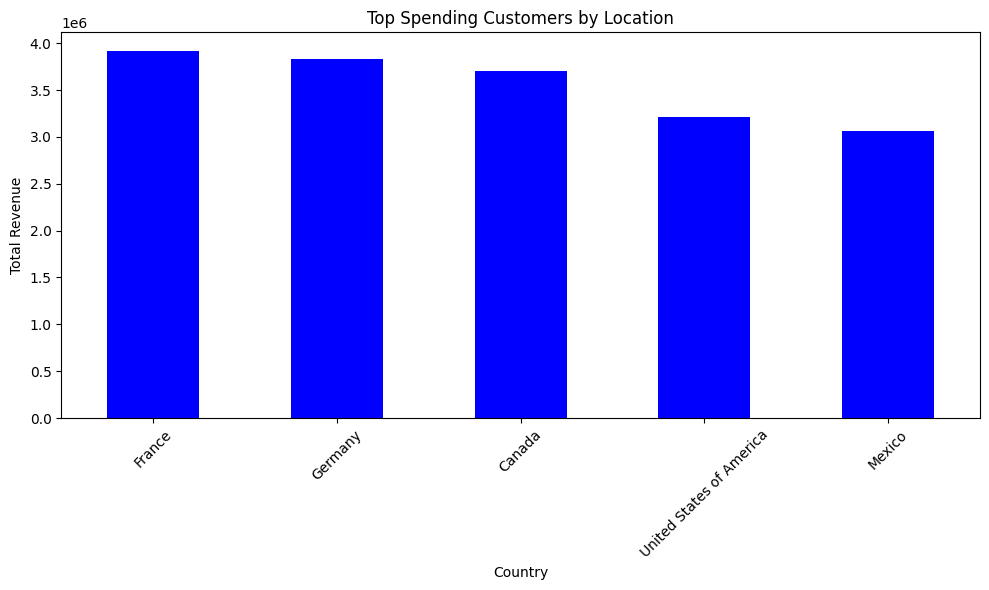

In [50]:
data=df[['Country','Revenue']]
dfk = pd.DataFrame(data)


customer_revenue = dfk.groupby('Country')['Revenue'].sum()


top_spending_customers = customer_revenue.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_spending_customers.plot(kind='bar', color='blue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Top Spending Customers by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We have segmented our customers according to revenue france,us,mexico,germany,canada are the top customers.

15. **Visualizing Performance**

In [54]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year', 'Revenue', 'pro margin'],
      dtype='object')

<Axes: xlabel=' Profit ', ylabel='Count'>

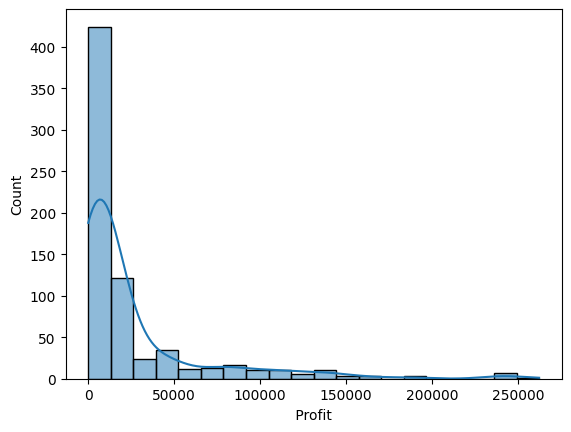

In [56]:
sns.histplot(data=df, x=' Profit ', bins=20, kde=True)

<Axes: xlabel='  Sales ', ylabel='Count'>

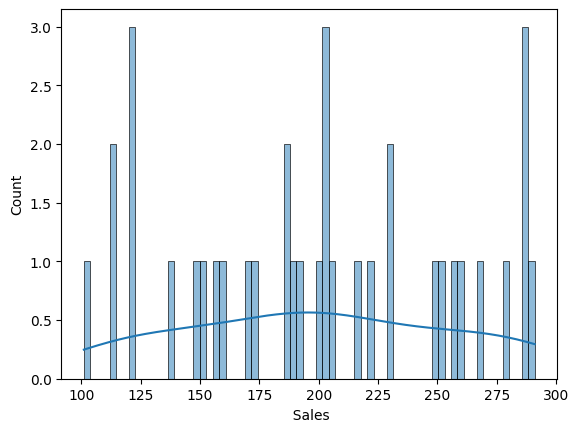

In [74]:
sns.histplot(data=df, x='  Sales ', bins=70, kde=True)

We have to ignore 0 because we actually filled our null values with zero.So apart from that we are having no.of profits in between 0-50000.Sales is high in 125,200,275-300.

**conclusion:**By Considering all the plots and analysing we can understand that product "Amrilla" is the best performer and when we consider sales in countries united states is having the highest sales.When we talk about forecasting it is consistent in the starting by the end its reaching the peaks.Our top customers are france,mexico,us..etc
